<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> IFTA en campo cercano: binary-continuous or amplitude-phase </font>
</div>

- **Para**: IFTA

- **Fecha**: 2021/11/12
        
- **Autores**: 
    - Luis Miguel Sánchez Brea
   

- **Objetivos**: Desarrollar el algoritmo IFTA en campo lejano y cercano con la binarización incorporada y eliminando la parte de amplitud / fase. 

- **Descripción** El Algoritmo IFTA que tenemos implementado es directamente el algoritmo continuo de fase, y luego binarizamos y/o pasamos a amplitud. Aquí lo que hacemos es implementar las restricciones en el propio proceso.

- **Referencias**: 
    -R. W. Gerchberg and W. O. Saxton, “A Practical Algorithm for the Determination of Phase from Image and Diffraction Plane Pictures,” Optik (Stuttg)., vol. 35, no. 2, pp. 237–246, 1972. 

# Código

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from diffractio import um, mm, nm, np, sp, plt, degrees
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.utils_drawing import draw_several_fields

from py_aocg.ifta.parameters import RMSE,  verify_mask,  make_binary
from py_aocg.ifta.algorithms import GS_scalar_far, GS_scalar_Fresnel, GS_Fresnel_algorithm_deprecated, GS_far_algorithm_deprecated

number of processors: 8
total memory        : 15.5 Gb
available memory    : 62 %
max frequency       : 3100 GHz
py_aocg
number of processors: 8
total memory        : 15.5 Gb
available memory    : 62 %
max frequency       : 3100 GHz


## Mask a

In [3]:
num_x=128
num_y=128
DOE_size=40*um

x=np.linspace(-DOE_size/2,DOE_size/2, num_x)
y=np.linspace(-DOE_size/2,DOE_size/2, num_y)
wavelength=0.6328*um

In [4]:
source=Scalar_source_XY(x,y,wavelength)
source.plane_wave()



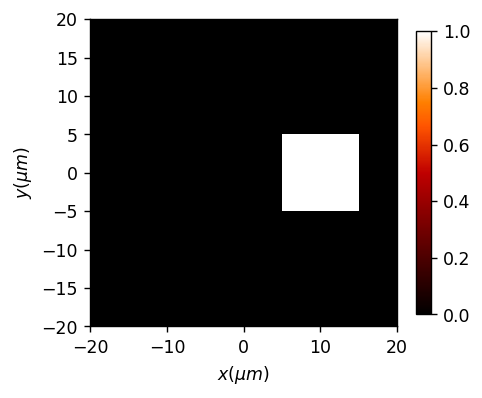

In [5]:
target=Scalar_mask_XY(x,y,wavelength)
target.square(r0=(10,0), size=(10,10), angle=0)
target.draw(has_colorbar='vertical');

## Campo cercano

### Direct propagation

In [6]:
z_distance=15*um


Good result: factor 1.60


(<Figure size 500x500 with 2 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f4c9bfda4f0>)

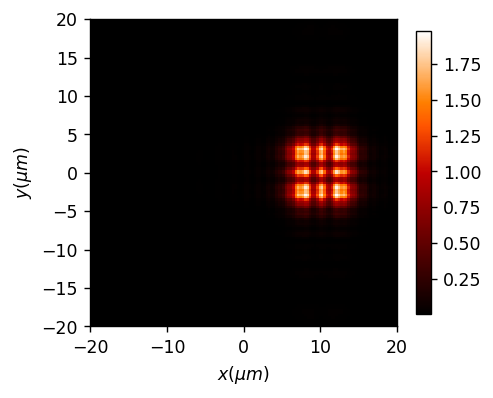

In [7]:
u_direct = target.RS(z=z_distance, verbose=True)
u_direct.draw(has_colorbar='vertical')

### Computation - continuous

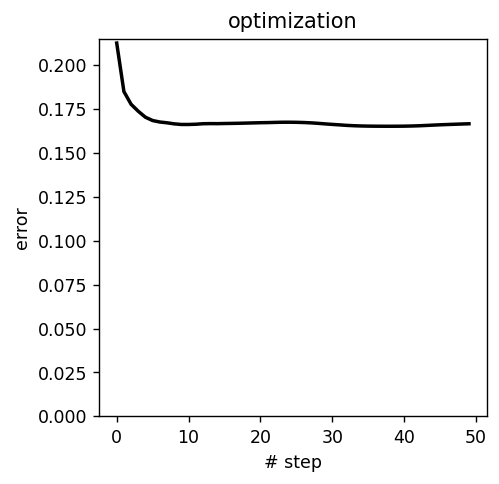

In [9]:
num_steps=50


DOE_old, mask_final, errors = GS_Fresnel_algorithm_deprecated(z_distance, None, target, num_steps=num_steps, has_draw=True)

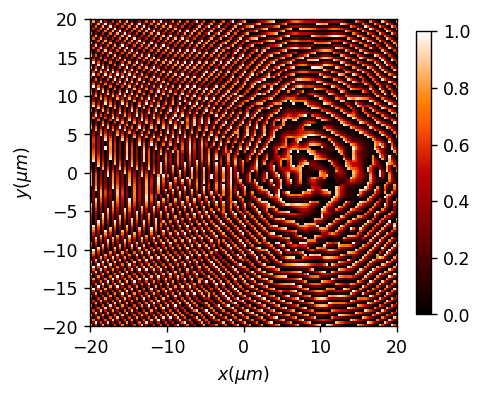

In [10]:
mask_final.draw('intensity', has_colorbar='vertical');

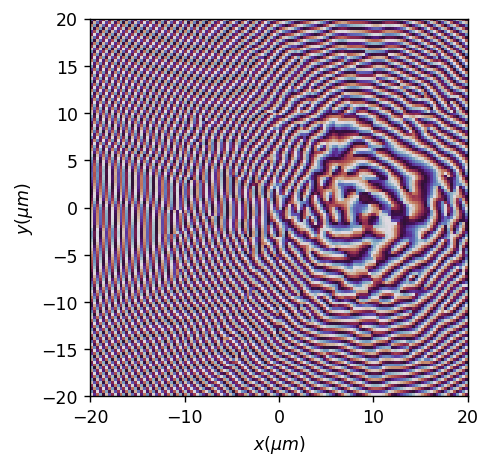

In [11]:
DOE_old.draw('phase');

Good result: factor 1.60


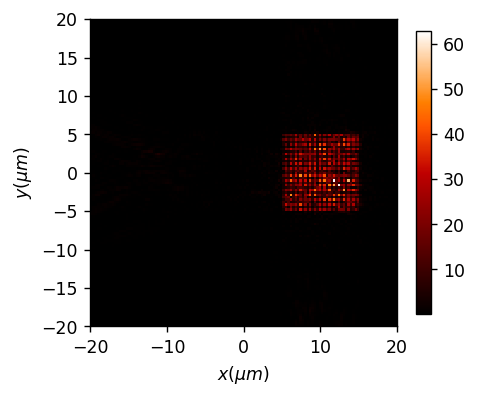

In [12]:
u_final_old = DOE_old.RS(z=z_distance, verbose=True)
u_final_old.draw(has_colorbar='vertical');

### New

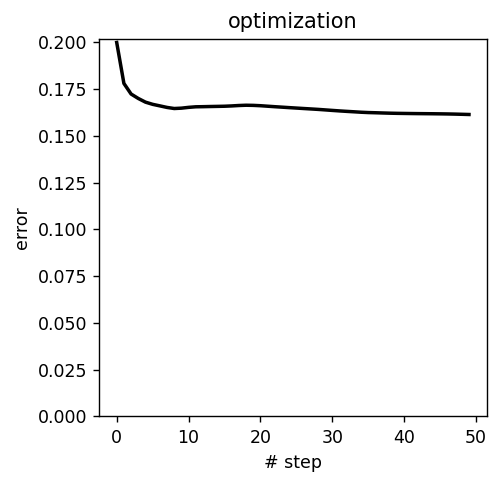

In [13]:
num_steps=50

DOE_new, mask_final, errors = GS_scalar_Fresnel(z_distance, None,target, num_steps=num_steps, kind='phase', is_binary=False, has_draw=True)

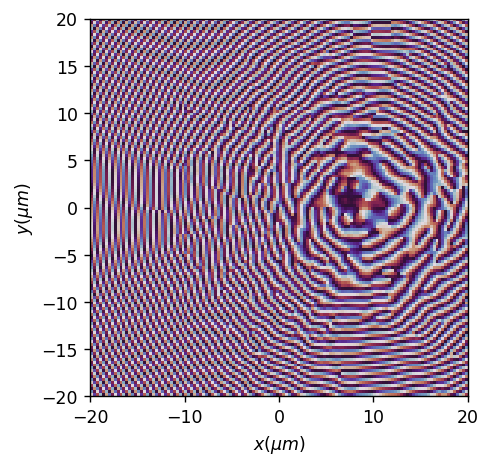

In [14]:
DOE_new.draw('phase');

Good result: factor 1.60


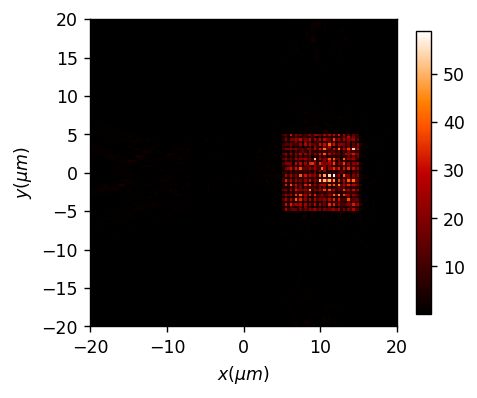

In [15]:
u_final_new = DOE_new.RS(z=z_distance, verbose=True)
u_final_new.draw(has_colorbar='vertical');

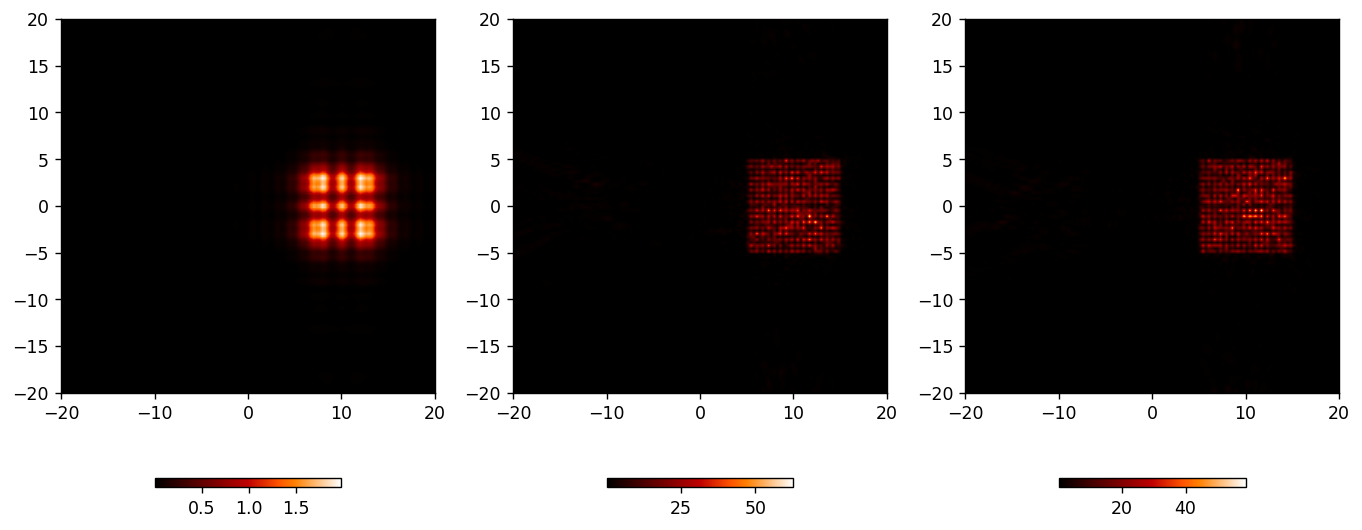

In [16]:
draw_several_fields((u_direct, u_final_old, u_final_new))
plt.tight_layout()

## Campo lejano

### Propagación directa

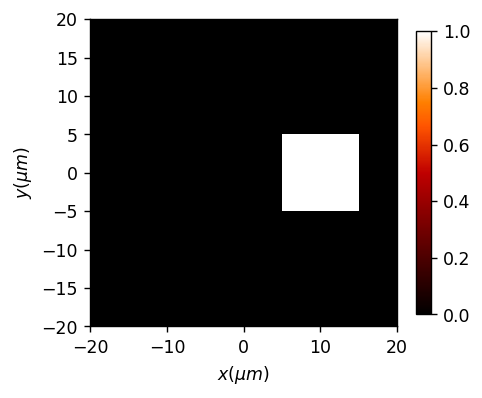

In [17]:
target=Scalar_mask_XY(x,y,wavelength)
target.square(r0=(10,0), size=(10,10), angle=0)
target.draw(has_colorbar='vertical');

(<Figure size 500x500 with 2 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f4c9a072d60>)

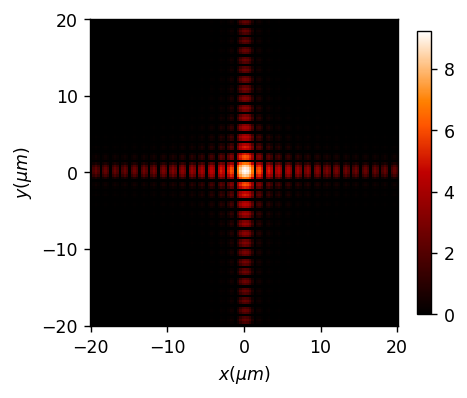

In [18]:
u_direct = target.fft(z=20*um, new_field=True, remove0=False)
u_direct.draw(has_colorbar='vertical', logarithm=1e-2)

### Algoritmo continuo

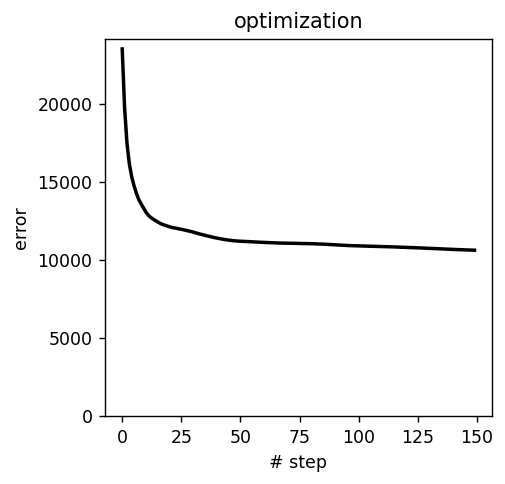

In [19]:
num_steps=150

DOE_far_old, mask_final, errors = GS_far_algorithm_deprecated(None,target,  num_steps=num_steps, has_draw=True)

TypeError: Invalid shape () for image data

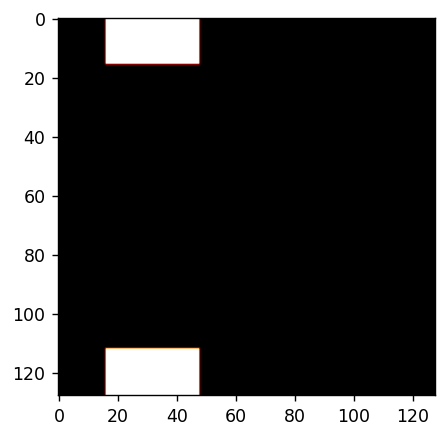

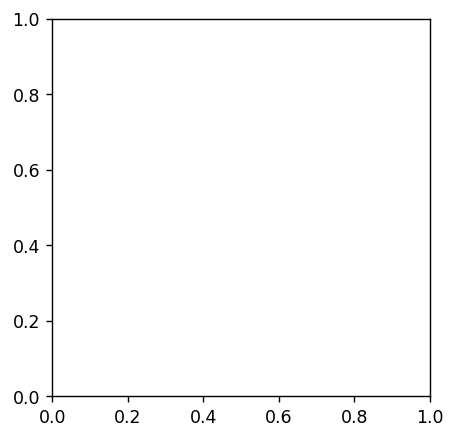

In [20]:
DOE_far_old, mask_final, errors = GS_scalar_far(None,target, kind='phase', is_binary=False, num_steps=num_steps, has_draw=True)

(<Figure size 500x500 with 2 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f4c9e236e80>)

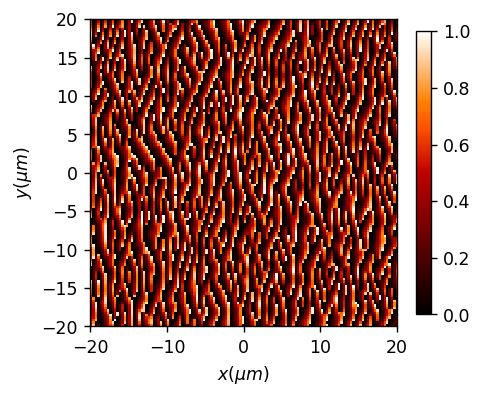

In [21]:
mask_final.draw(has_colorbar='vertical')

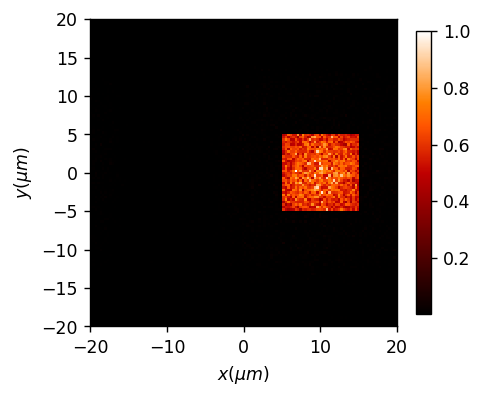

In [22]:
u_far_old = DOE_far_old.fft(new_field=True, shift=True, remove0=False)
u_far_old.normalize()
u_far_old.draw(has_colorbar='vertical', logarithm=0);

### Algoritmo binarizado

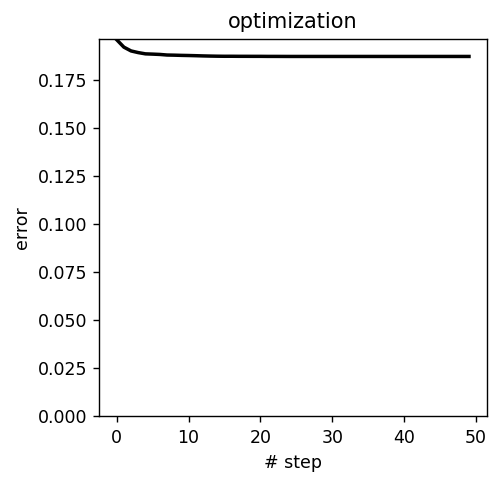

In [24]:
num_steps=50

DOE_far_new, mask_final, errors = GS_scalar_far(source,target, kind='phase', is_binary=True, phase=np.pi, num_steps=num_steps, has_draw=True)

(<Figure size 500x500 with 2 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f4c9a283d90>)

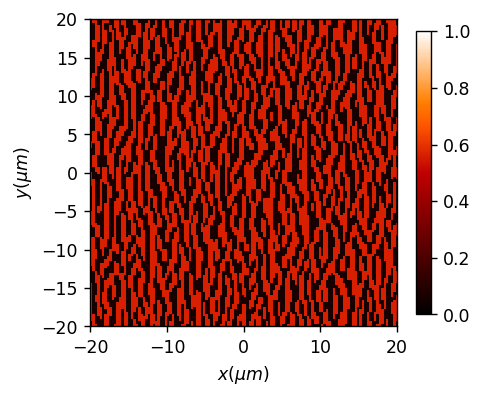

In [25]:
mask_final.draw(has_colorbar='vertical')

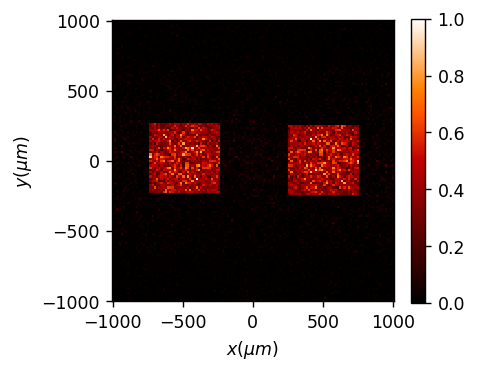

In [26]:
u_far_new = DOE_far_new.fft(z=1*mm,new_field=True, remove0=True)
u_far_new.normalize()
u_far_new.draw(has_colorbar='vertical', logarithm=False );

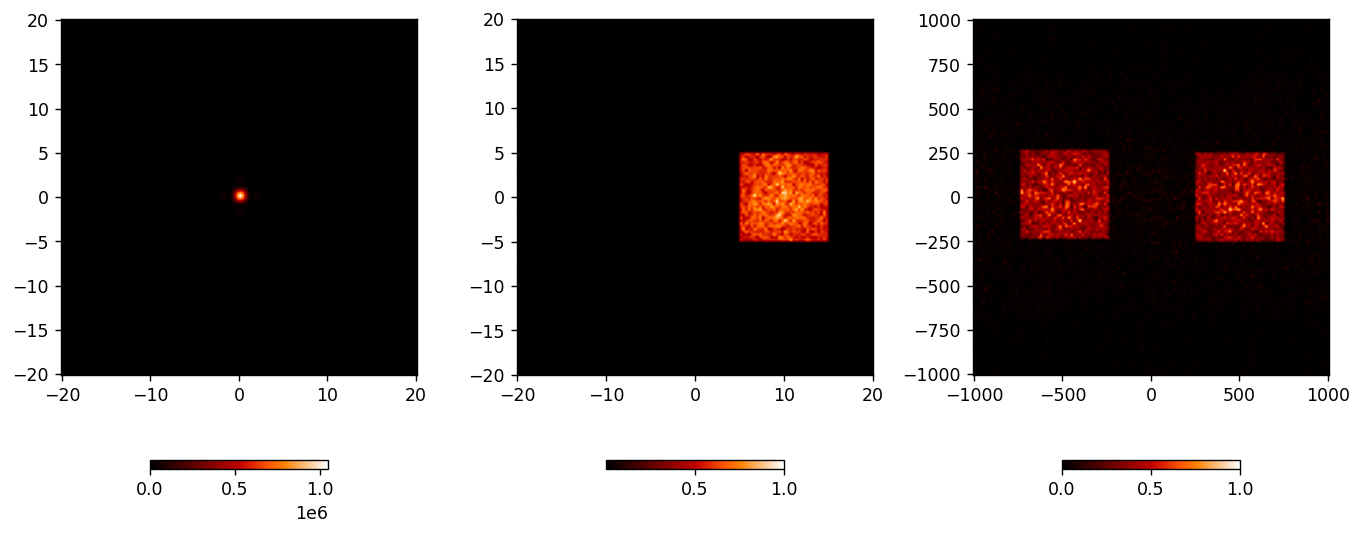

In [27]:
draw_several_fields((u_direct, u_far_old, u_far_new))
plt.tight_layout()